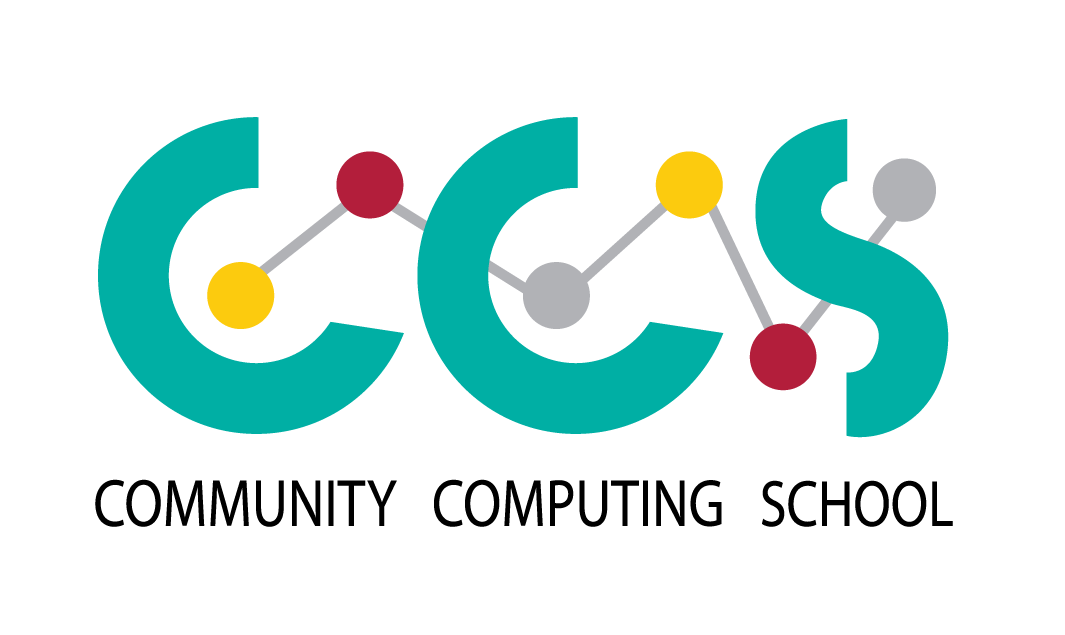

# k-Nearest Neighbors (KNN) from Scratch

## KNN Model Representation

* The model representation for KNN is the entire training dataset.

* KNN has no model other than storing the entire dataset, so there is **no learning required**.

## Making Predictions with KNN

* KNN makes predictions using the training dataset directly.

* Predictions are made for a new data point by searching through the entire training set for the k most similar instances (the neighbors) and summarizing the output variable for those k instances.

* For regression this might be **the mean output variable**, in classification this might be **the mode (or most common) class value**.

* To determine which of the k instances in the training dataset are most similar to a new input **a distance measure** is used. For real-valued input variables, the most popular distance measure is **Euclidean distance**.

* **Euclidean distance** is calculated as the square root of the sum of the squared differences between a point a and point b across all input attributes i.

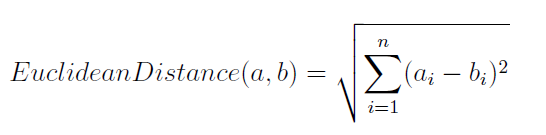

* Other popular distance measures include:
    * **Hamming Distance:** Calculate the distance between binary vectors.
    * **Manhattan Distance:** Calculate the distance between real vectors using the sum of their absolute difference. Also called **City Block Distance**.
    * **Minkowski Distance:** Generalization of Euclidean and Manhattan distance.

In [84]:
from math import sqrt
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    #print(row1)
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [85]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train.values:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [86]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [87]:
# kNN Algorithm
def k_nearest_neighbors(X_train, X_test, num_neighbors):
    predictions = list()
    for row in X_test.values:
        output = predict_classification(X_train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

In [88]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [89]:
df = pd.read_csv("../DataSet/abalone.csv",header=None)

In [90]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [91]:
df[0].value_counts()

M    1528
I    1342
F    1307
Name: 0, dtype: int64

In [92]:
df[0] = df[0].map({'M':0, 'I':1, 'F':2})

In [93]:
df.head()

,0,1,2,3,4,5,6,7,8
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [94]:
X = df.drop(8, axis=1)
y = df[8]

In [96]:
X_train, X_test = train_test_split(df, test_size=0.33, random_state=42)

In [97]:
X_train.head()

,0,1,2,3,4,5,6,7,8
1593,1,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750,8
111,0,0.465,0.360,0.105,0.4310,0.1720,0.1070,0.1750,9
3271,0,0.520,0.425,0.155,0.7735,0.2970,0.1230,0.2550,17
1089,1,0.450,0.330,0.105,0.3715,0.1865,0.0785,0.0975,7
2918,1,0.600,0.445,0.135,0.9205,0.4450,0.2035,0.2530,9


In [98]:
X_test.head()

,0,1,2,3,4,5,6,7,8
866,0,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,9
1483,0,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,8
599,2,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,16
1702,2,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,9
670,0,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,14


In [99]:
num_neighbors = 5

In [100]:
predicted = k_nearest_neighbors(X_train, X_test, num_neighbors)

In [101]:
print (accuracy_score(X_test[8].values, predicted))

0.24147933284989123


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
model = KNeighborsClassifier(n_neighbors=num_neighbors)

In [105]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
predictions = model.predict(X_test)

In [107]:
print (accuracy_score(y_test, predictions))

0.24655547498187091
